##(1) (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

Answer : The sigmoid function's ability to produce well-behaved probabilities and introduce non-linearity makes it a suitable choice for binary classification problems.


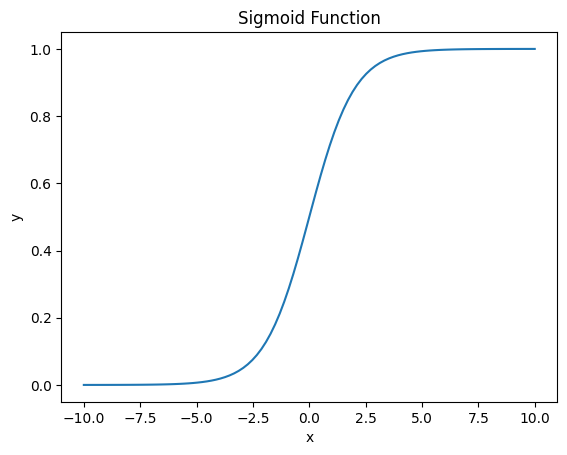

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##(b) Plot the log functions in the cost function individually. Print your interpretation of the log functions

Answer : The log function is used to penalize the model logarithmically according to the difference between the predicted probability and the true label. This helps in training models to make better predictions by minimizing the loss.


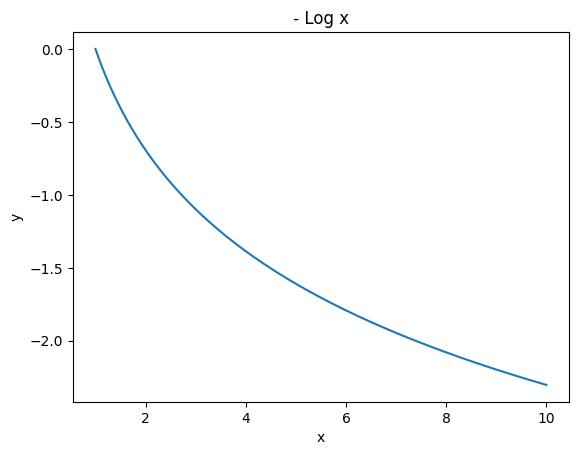

In [25]:
x = np.linspace(1,10,1000)
y = np.log(x)
plt.plot(x,-y)
plt.title(" - Log x ")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

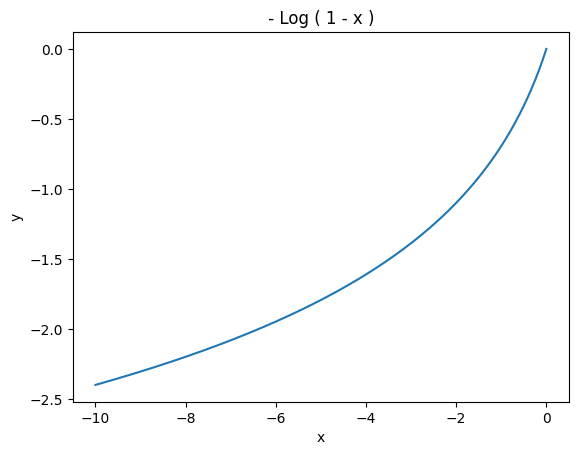

In [24]:
x = np.linspace(-10,0,1000)
y = np.log(1-x)
plt.plot(x,-y)
plt.title(" - Log ( 1 - x ) ")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

 ## (c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. Also, using cross entropy as the cost function, plot it as well as its contours.




In [30]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Number of features
n_features = 1

# Number of classes
n_classes = 2

# Generate synthetic feature data
X = np.random.randn(n_samples, n_features)

# Generate synthetic target data
y = np.random.randint(0, n_classes, size=n_samples)

# Create a DataFrame to store the data
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, n_features + 1)])
df['Target'] = y

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('classification_dataset.csv', index=False)

   Feature_1  Target
0   0.496714       0
1  -0.138264       1
2   0.647689       0
3   1.523030       1
4  -0.234153       0


In [48]:
data = pd.read_csv('classification_dataset.csv')

X1 = data['Feature_1'].values.reshape(-1, 1)  # Feature matrix
X = np.concatenate((np.ones((len(X1), 1)), X1), axis=1)
y = data['Target'].values.reshape(-1, 1)  # Target vector


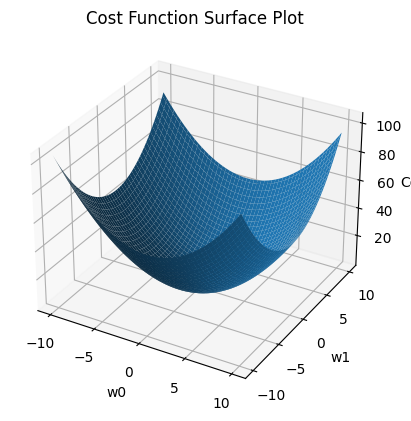

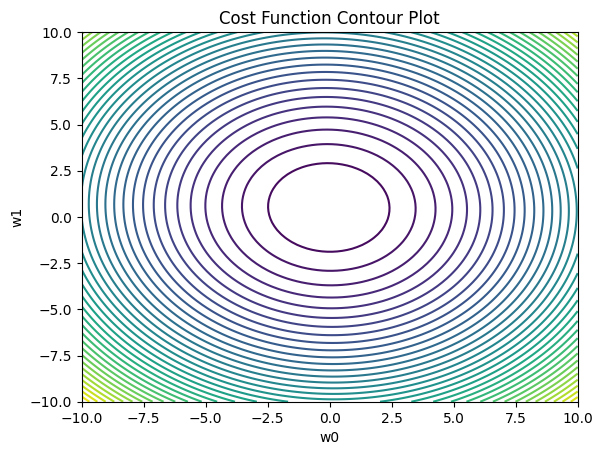

In [49]:
def h(X, w):
    val = np.dot(X, w)
    return val

def cost_function(X, y, w):
    m = len(y)
    h_x = h(X, w)
    cost = np.sum((h_x - y) ** 2) / (2 * m)
    return cost


w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
J_vals = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([[w0_vals[i]], [w1_vals[j]]])
        J_vals[i, j] = cost_function(X, y, w)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_vals)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface Plot')
plt.show()

plt.contour(W0, W1, J_vals, levels= 40)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cost Function Contour Plot')
plt.show()

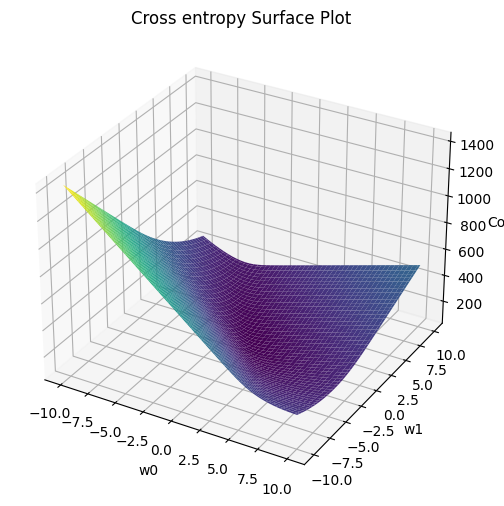

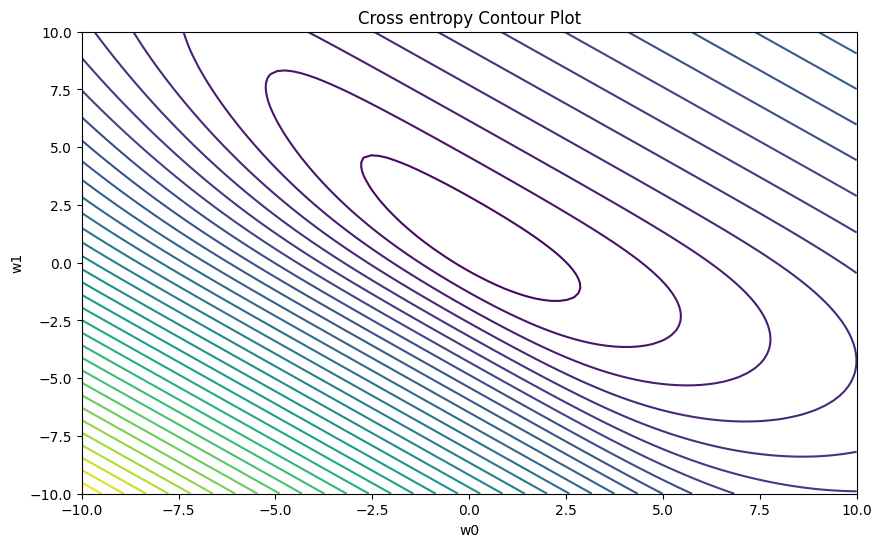

In [45]:
def cross_ent_cost(w, X, y):
    m = len(y)
    h = sigmoid(X.dot(w))
    cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (np.random.rand(100, 1) < sigmoid(3 * X - 1)).astype(int)

# Add a column of ones to X for the bias term
X_b = np.c_[np.ones((len(X), 1)), X]

w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-10, 10, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
J_vals = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([w0_vals[i], w1_vals[j]])
        J_vals[i, j] = cross_ent_cost(w, X_b, y)

# Plot surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, J_vals, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost')
ax.set_title('Cross entropy Surface Plot')
plt.show()

# Plot contours
plt.figure(figsize=(10, 6))
plt.contour(W0, W1, J_vals, levels=40, cmap='viridis')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Cross entropy Contour Plot')
plt.show()